In [1]:
#multilayer perceptron from scratch using numpy and mnist data

In [2]:
import keras
from sklearn.preprocessing import LabelBinarizer   #importing mnist dataset from keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [7]:
def load_dataset(flatten=False):
    (X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
    X_train=X_train.astype(float)/255
    X_test=X_test.astype(float)/255
    
    X_train,X_val=X_train[:10000],X_train[-10000:]
    y_train,y_val=y_train[:10000],X_train[-10000:]
    
    if flatten:
        X_train=X_train.reshape([X_train.shape[0],-1])
        X_val=X_val.reshape([X_val.shape[0],-1])
        X_test=X_test.rehape([X_test.shape[0],-1])
    return X_train,X_val,X_test,y_test,y_train,y_val    

(10000, 28, 28) (10000,)


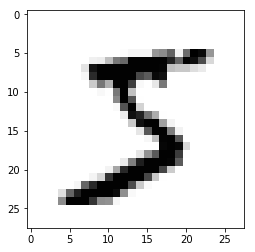

In [8]:
X_train,X_val,X_test,y_test,y_train,y_val=load_dataset()
print(X_train.shape,y_train.shape)
plt.imshow(X_train[0],cmap="Greys")

In [9]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print('Train dimension:');print(X_train.shape)
print('test dimension:');print(X_test.shape)
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)
print('train label dimension:');print(y_train.shape)
print('test label dimension:');print(y_test.shape)

Train dimension:
(10000, 784)
test dimension:
(10000, 784)
train label dimension:
(10000, 10)
test label dimension:
(10000, 10)


In [10]:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [31]:
import numpy as np
import tensorflow as tf

In [32]:
# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')

In [33]:
#for dropout layer
keep_prob = tf.placeholder(tf.float32)

In [34]:
weights_0=tf.Variable(tf.random_normal([num_features,num_layers_0],stddev=(1/tf.sqrt(float(num_features)))))
bias_0=tf.Variable(tf.random_normal([num_layers_0]))
weights_1=tf.Variable(tf.random_normal([num_layers_0,num_layers_1],stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1=tf.Variable(tf.random_normal([num_layers_1]))
weights_2=tf.Variable(tf.random_normal([num_layers_1,num_output],stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2=tf.Variable(tf.random_normal([num_output]))

In [35]:
## Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

In [36]:
## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

In [37]:
## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])

In [38]:
## Metrics definition
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [39]:
s=tf.Session()

In [43]:
from sklearn.metrics import accuracy_score 

In [44]:
## Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Epoch:0, Train loss: 72.21 Train acc: 0.873, Test acc:0.869
Epoch:1, Train loss: 63.98 Train acc: 0.913, Test acc:0.903
Epoch:2, Train loss: 56.79 Train acc: 0.929, Test acc:0.916
Epoch:3, Train loss: 50.47 Train acc: 0.936, Test acc:0.919
Epoch:4, Train loss: 44.88 Train acc: 0.948, Test acc:0.931
Epoch:5, Train loss: 39.95 Train acc: 0.954, Test acc:0.936
Epoch:6, Train loss: 35.58 Train acc: 0.958, Test acc:0.939
Epoch:7, Train loss: 31.70 Train acc: 0.963, Test acc:0.942
Epoch:8, Train loss: 28.25 Train acc: 0.967, Test acc:0.944
Epoch:9, Train loss: 25.18 Train acc: 0.972, Test acc:0.947
Epoch:10, Train loss: 22.46 Train acc: 0.975, Test acc:0.948
Epoch:11, Train loss: 20.03 Train acc: 0.975, Test acc:0.945
Epoch:12, Train loss: 17.87 Train acc: 0.979, Test acc:0.951
Epoch:13, Train loss: 15.95 Train acc: 0.982, Test acc:0.953


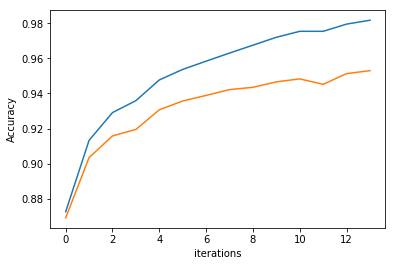

Train Accuracy: 0.98
Test Accuracy:0.95


In [45]:
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))